In [1]:
import os
import sys
import click
import shutil

import numpy as np
import pandas as pd
from traffic.data import opensky, airports

parent_dir = os.path.abspath("/home/kruu/git_folder/")
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

root_dir = os.path.join(parent_dir, "P2P_base")
print(f"Parent dir: {parent_dir}")
print(f"Root dir: {root_dir}")
    
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from P2P_base.wake import aircraft, meteo, wake

flight = (
    opensky.history(
        "2018-07-04 08:58:28",
        stop="2018-07-04 09:06:36",
        icao24="4b1887",
        return_flight=True,
    )
    .distance(airports["LSZH"])
    .compute_xy("epsg:2056")
)
meteo_data = meteo.Meteo.from_metar('LSZH', timestamp=flight.stop, bearing=flight.at().track, extrapolate=True)
fpath_edr = os.path.join(root_dir, "p2p", "EDR.dat")
edr_data = meteo.EDR.from_dat_file(fpath_edr)

wakes = wake.Wake.generate(aircraft=flight,
                            meteo=meteo_data,
                            edr=edr_data,
                            at_time=(flight.stop - pd.Timedelta('300s')),
                            path= os.path.abspath("/home/kruu/git_folder/wake_encounter/data/test_wakes"),
                            verbose=True) 

/home/kruu/.conda/envs/wake_encounter/lib/python3.10/site-packages/pyopensky/impala.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Parent dir: /home/kruu/git_folder
Root dir: /home/kruu/git_folder/P2P_base


/home/kruu/.conda/envs/wake_encounter/lib/python3.10/site-packages/pyarrow/pandas_compat.py:722: DeprecationWarning: DatetimeTZBlock is deprecated and will be removed in a future version. Use public APIs instead.
  klass=_int.DatetimeTZBlock,


/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/1/fort.13
 Abs path: /home/kruu/git_folder/wake_encounter/data/test_wakes
 Run ID: 1
 Input dir: /home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/1
 Results dir: /home/kruu/git_folder/wake_encounter/data/test_wakes/results/1
 Reading file /home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/1/fort
 .13
 Reading file /home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/1/ac_i
 nit.dat
 
t0    =   44.8
gam0  =  314.5
b0    =   47.4
y0    =    0.0
x0    =    0.0
z0    = 1785.5
nit   =    350
uac   =  130.2
gpa   =    3.0
 ----------------
   rmsy   rmsz   rmsc
    NaN    NaN    NaN
 ----------------
 ready



In [8]:
os.getcwd()

'/home/kruu'

In [ ]:
import os
import sys

dir_p2p = os.path.abspath("/home/kruu/git_folder")
if  dir_p2p not in sys.path:
    sys.path.append(dir_p2p)
    
root_dir = os.path.join(dir_p2p, "P2P_base")

In [2]:
from P2P_base.wake import wake, aircraft, meteo
from traffic.data import opensky, airports
import pandas as pd

/home/kruu/.conda/envs/wake_encounter/lib/python3.10/site-packages/pyopensky/trino.py:571: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  StateVectorsData4.hour >= start_ts.floor("1H"),
/home/kruu/.conda/envs/wake_encounter/lib/python3.10/site-packages/pyopensky/trino.py:572: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  StateVectorsData4.hour < stop_ts.ceil("1H"),
/home/kruu/.conda/envs/wake_encounter/lib/python3.10/site-packages/pyarrow/pandas_compat.py:722: DeprecationWarning: DatetimeTZBlock is deprecated and will be removed in a future version. Use public APIs instead.
  klass=_int.DatetimeTZBlock,


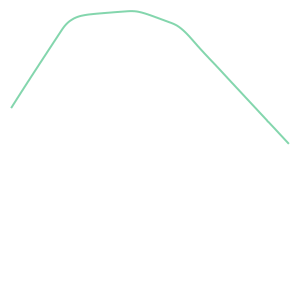

In [3]:
flight = (
    opensky.history(
        "2018-07-04 08:58:28",
        stop="2018-07-04 09:06:36",
        icao24="4b1887",
        return_flight=True,
    )
    .distance(airports["LSZH"])
    .compute_xy("epsg:2056")
)

flight

In [4]:
# meteo_data = meteo.Meteo.from_idaweb_klo(
#     timestamp=flight.stop,
#     bearing=flight.at().track,
#     qq=0.05,
#     idaweb_file_path=os.path.join(root_dir, "data", "meteo_KLO.csv"),
#     extrapolate=True
#     )

meteo_data = meteo.Meteo.from_metar('LSZH', timestamp=flight.stop, bearing=flight.at().track, extrapolate=True)

In [5]:
fpath_edr = os.path.join(root_dir, "p2p", "EDR.dat")
edr_data = meteo.EDR.from_dat_file(fpath_edr)

In [6]:
# meteo_data = meteo.Meteo.from_dat_file("/home/kruu/git_folder/P2P_base/p2p/meteo.dat")
# edr_data = meteo.EDR.from_dat_file("/home/kruu/git_folder/P2P_base/p2p/EDR.dat")
# aircraft_data = aircraft.Aircraft.from_dat_file("/home/kruu/git_folder/P2P_base/p2p/ac_init.dat")

In [7]:
wakes = wake.Wake.generate(aircraft=flight,
                            meteo=meteo_data,
                            edr=edr_data,
                            at_time=(flight.stop - pd.Timedelta('300s')),
                            path= os.path.abspath("/home/kruu/git_folder/wake_encounter/data/test_wakes"),
                            verbose=True) 

/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/1/fort.13
 Abs path: /home/kruu/git_folder/wake_encounter/data/test_wakes
 Run ID: 1
 Input dir: /home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/1
 Results dir: /home/kruu/git_folder/wake_encounter/data/test_wakes/results/1
 Reading file /home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/1/fort
 .13
 Reading file /home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/1/ac_i
 nit.dat
 
t0    =   44.8
gam0  =  314.5
b0    =   47.4
y0    =    0.0
x0    =    0.0
z0    = 1785.5
nit   =    350
uac   =  130.2
gpa   =    3.0
 ----------------
   rmsy   rmsz   rmsc
    NaN    NaN    NaN
 ----------------
 ready



In [7]:
wakes

,gam_l,yl,zl,gam_r,yr,zr,x,z_2s_lo,z_2s_hi,z_3s_lo,...,x_2s_r_ref,y_2s_r_ref,x_2s_l_ref,y_2s_l_ref,x_3s_r_ref,y_3s_r_ref,x_3s_l_ref,y_3s_l_ref,wind_dir,wind_speed
t,,,,,,,,,,,,,,,,,,,,,
2018-07-04 09:01:37+00:00,313.874,-26.841,1784.461,313.874,20.510,1784.461,4.122368,1757.457,1813.986,1746.119,...,2.660407e+06,1.278461e+06,2.660418e+06,1.278560e+06,2.660404e+06,1.278436e+06,2.660421e+06,1.278585e+06,280.0,3.086667
2018-07-04 09:01:38+00:00,313.291,-30.006,1783.404,313.291,17.345,1783.404,8.244737,1756.386,1812.944,1745.042,...,2.660412e+06,1.278464e+06,2.660423e+06,1.278563e+06,2.660409e+06,1.278439e+06,2.660425e+06,1.278588e+06,280.0,3.086667
2018-07-04 09:01:39+00:00,312.709,-33.171,1782.347,312.709,14.180,1782.347,12.367105,1755.314,1811.903,1743.964,...,2.660416e+06,1.278466e+06,2.660427e+06,1.278566e+06,2.660413e+06,1.278441e+06,2.660430e+06,1.278591e+06,280.0,3.086667
2018-07-04 09:01:40+00:00,312.127,-36.337,1781.290,312.127,11.014,1781.290,16.489473,1754.243,1810.862,1742.887,...,2.660420e+06,1.278469e+06,2.660432e+06,1.278568e+06,2.660418e+06,1.278444e+06,2.660434e+06,1.278593e+06,280.0,3.086667
2018-07-04 09:01:41+00:00,311.545,-39.502,1780.233,311.545,7.849,1780.233,20.611842,1753.172,1809.820,1741.810,...,2.660425e+06,1.278472e+06,2.660436e+06,1.278571e+06,2.660422e+06,1.278446e+06,2.660439e+06,1.278596e+06,280.0,3.086667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-04 09:07:21+00:00,72.131,-1112.906,1430.343,72.131,-1067.433,1430.343,1422.217064,1404.137,1512.530,1382.397,...,2.661936e+06,1.279373e+06,2.661949e+06,1.279495e+06,2.661932e+06,1.279342e+06,2.661953e+06,1.279526e+06,280.0,3.086667
2018-07-04 09:07:22+00:00,70.246,-1116.055,1429.743,70.246,-1070.593,1429.743,1426.339432,1403.303,1512.349,1381.431,...,2.661940e+06,1.279375e+06,2.661954e+06,1.279498e+06,2.661937e+06,1.279345e+06,2.661957e+06,1.279528e+06,280.0,3.086667
2018-07-04 09:07:23+00:00,68.383,-1119.204,1429.155,68.383,-1073.754,1429.155,1430.461800,1402.468,1512.168,1380.466,...,2.661945e+06,1.279378e+06,2.661958e+06,1.279500e+06,2.661941e+06,1.279347e+06,2.661962e+06,1.279531e+06,280.0,3.086667
